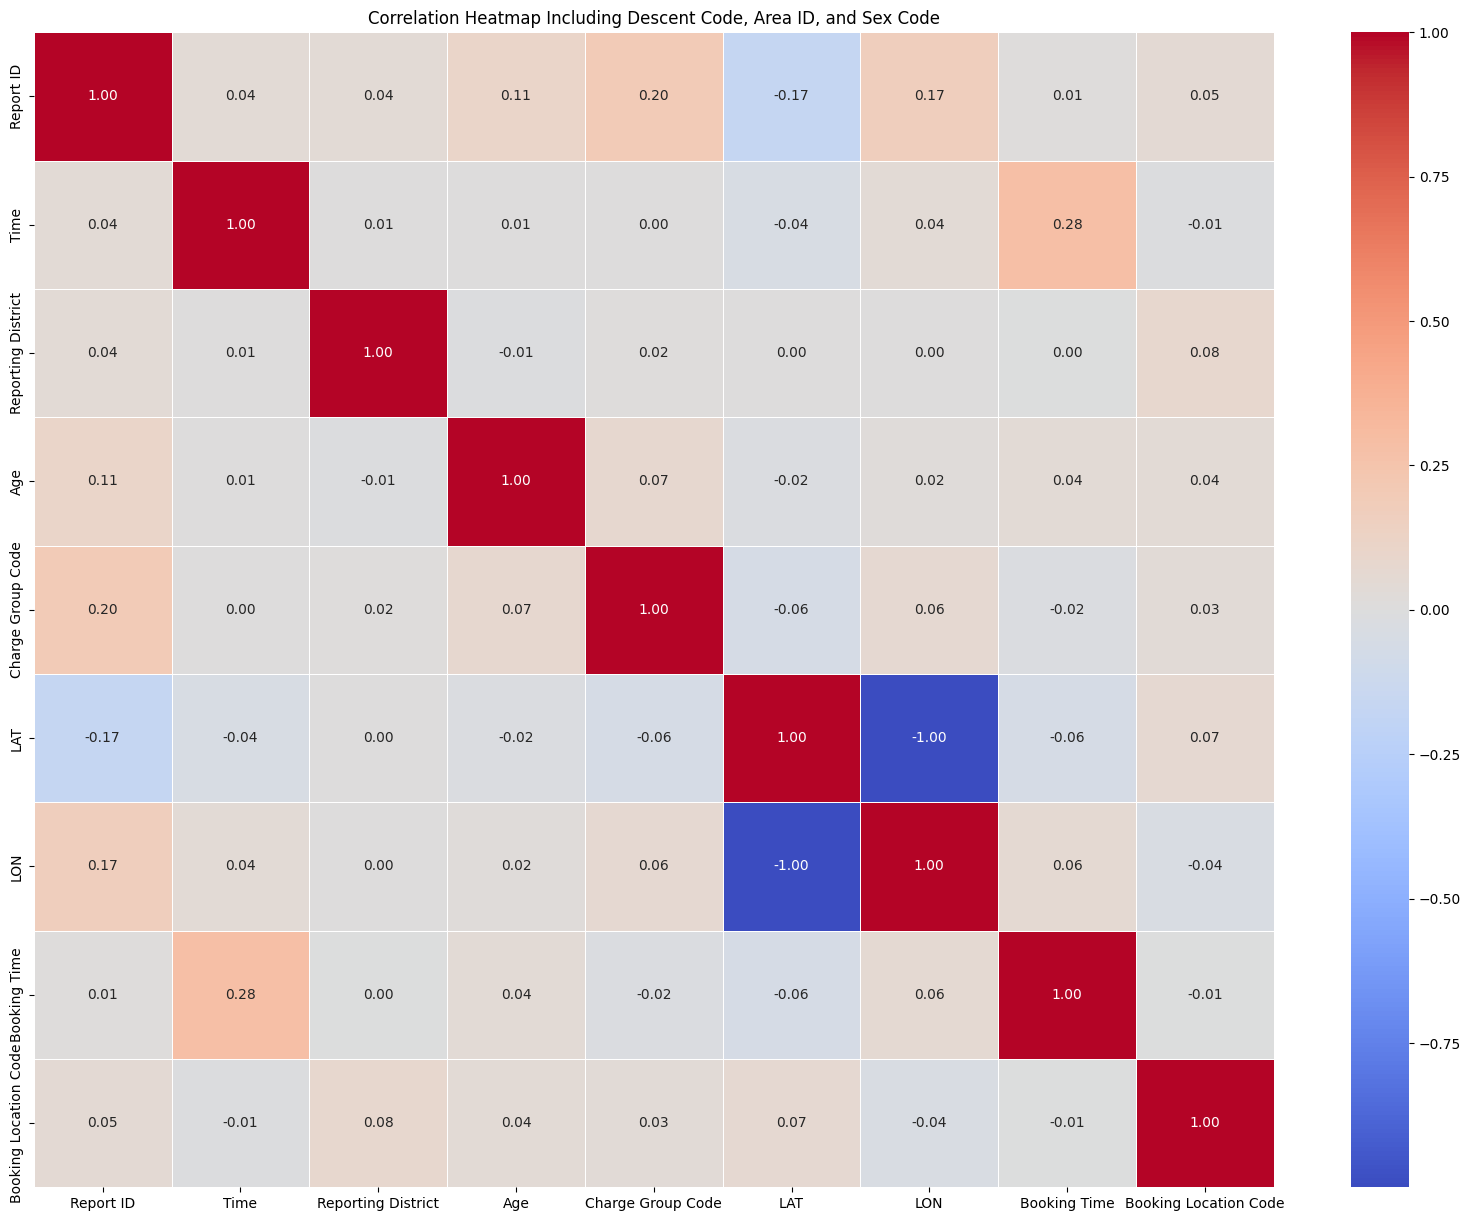

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pat naar de dataset
DATA_PATH = "Server/database/Arrest_Data_from_2020_to_Present.csv"

# laden
df = pd.read_csv(DATA_PATH)

# arrest naar pd datetime object
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# rijen verwijderen met ontbrekende waarden in de kolommen 'Age', 'Sex Code', 'Descent Code', 'Arrest Date', 'Area ID', 'Charge Description'
df.dropna(subset=['Age', 'Sex Code', 'Descent Code', 'Arrest Date', 'Area ID', 'Charge Description'], inplace=True)

#  omzetten van de kolommen categorieen
df['Sex Code'] = df['Sex Code'].astype('category')
df['Descent Code'] = df['Descent Code'].astype('category')
df['Area ID'] = df['Area ID'].astype(str)

# filter ongeloofwaardge waarden
df = df[(df['Age'] > 10) & (df['Age'] < 100)]

#one hot incoding voor categorien
df_encoded = pd.get_dummies(df, columns=['Descent Code', 'Area ID', 'Sex Code'], prefix=['Descent', 'Area', 'Sex'])


numerical_data = df_encoded.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(20, 15))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Including Descent Code, Area ID, and Sex Code")
plt.show()

Aantal ontbrekende waardes per kolom:
Report ID                        0
Report Type                      0
Arrest Date                      0
Time                            16
Area ID                          0
Area Name                        0
Reporting District               0
Age                              0
Sex Code                         0
Descent Code                     0
Charge Group Code                0
Charge Group Description        51
Arrest Type Code                 0
Charge                           0
Charge Description               0
Disposition Description      27509
Address                          0
Cross Street                163035
LAT                              0
LON                              0
Location                         0
Booking Date                 45229
Booking Time                 45229
Booking Location             45269
Booking Location Code        45233
dtype: int64

Unieke waarden in 'Sex Code': ['M', 'F']
Categories (2, object): ['F', 'M

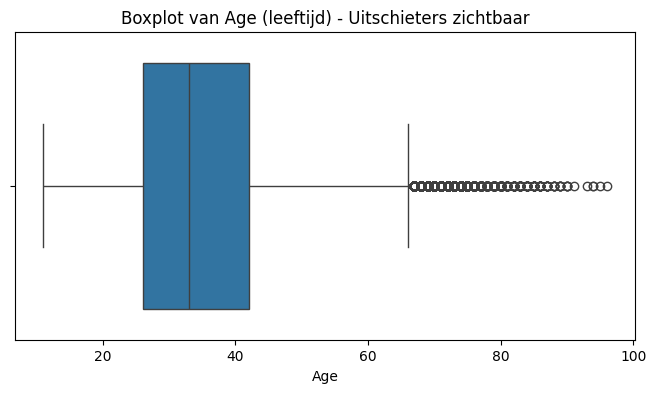

In [ ]:
# nullen van de dataset
print("Aantal ontbrekende waardes per kolom:")
print(df.isnull().sum())

# unieke waarden in de categorische kolommen
print("\nUnieke waarden in 'Sex Code':", df['Sex Code'].unique())
print("Unieke waarden in 'Descent Code':", df['Descent Code'].unique())
print("Unieke waarden in 'Area ID':", df['Area ID'].unique())

# onrealisteische waarden in de kolom 'Age'
print("\nMinimum leeftijd:", df['Age'].min())
print("Maximum leeftijd:", df['Age'].max())

# IQR voor boxplot
# Bereken de IQR voor de kolom 'Age' om uitschieters te identificeren
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"\nAantal uitschieters in 'Age': {len(outliers)}")
print("Voorbeeld van uitschieters in 'Age':")
print(outliers[['Age', 'Sex Code', 'Descent Code', 'Area ID']].head())

# boxplot toont de verdeling van de leeftijden, inclusief uitschieters
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot van Age (leeftijd) - Uitschieters zichtbaar")
plt.show()